In [1]:
import json
import numpy as np
import pandas as pd
import requests

In [3]:
def get_json(api_url):
    response = requests.get(api_url)
    if response.status_code == 200:
        return json.loads(response.content.decode('utf-8'))
    else:
        return None

In [13]:
record_date = '2020-08-17'
covid_url = 'https://covid19-api.org/api/status?date='+record_date
df_covid_worldwide = pd.io.json.json_normalize(get_json(covid_url))

print(df_covid_worldwide.head())

  country          last_update    cases  deaths  recovered
0      US  2020-08-16T23:27:50  5401167  170019    1833067
1      BR  2020-08-16T23:27:50  3340197  107852    2655017
2      IN  2020-08-16T23:27:50  2589682   49980    1862258
3      RU  2020-08-16T23:27:50   920719   15653     731444
4      ZA  2020-08-16T23:27:50   587345   11839     472377


D:\Anconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
df_covid_worldwide['last_update'] = pd.to_datetime(df_covid_worldwide['last_update'], format='%Y-%m-%d %H:%M:%S')

In [15]:
df_covid_worldwide['last_update'] = df_covid_worldwide['last_update'].apply(lambda x: x.date())

In [19]:
countries_url = 'https://covid19-api.org/api/countries'
df_countries = pd.io.json.json_normalize(get_json(countries_url))
df_countries = df_countries.rename(columns={'alpha2': 'country'})[['name','country']]

D:\Anconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


In [20]:
df_countries.head()

,name,country
0,Afghanistan,AF
1,Albania,AL
2,Algeria,DZ
3,Andorra,AD
4,Angola,AO


In [21]:
df_covid_denormalized = pd.merge(df_covid_worldwide , df_countries, on='country')

print(df_covid_denormalized.head())

  country last_update    cases  deaths  recovered                      name
0      US  2020-08-16  5401167  170019    1833067  United States of America
1      BR  2020-08-16  3340197  107852    2655017                    Brazil
2      IN  2020-08-16  2589682   49980    1862258                     India
3      RU  2020-08-16   920719   15653     731444        Russian Federation
4      ZA  2020-08-16   587345   11839     472377              South Africa


In [23]:
df_covid_denormalized['fatality_ratio'] = df_covid_denormalized['deaths']/df_covid_denormalized['cases']

In [24]:
df_top_20_fatality_rate = df_covid_denormalized.sort_values(by='fatality_ratio', ascending=False).head(20)

# Visualisasi Data

In [25]:
import matplotlib.pyplot  as plt

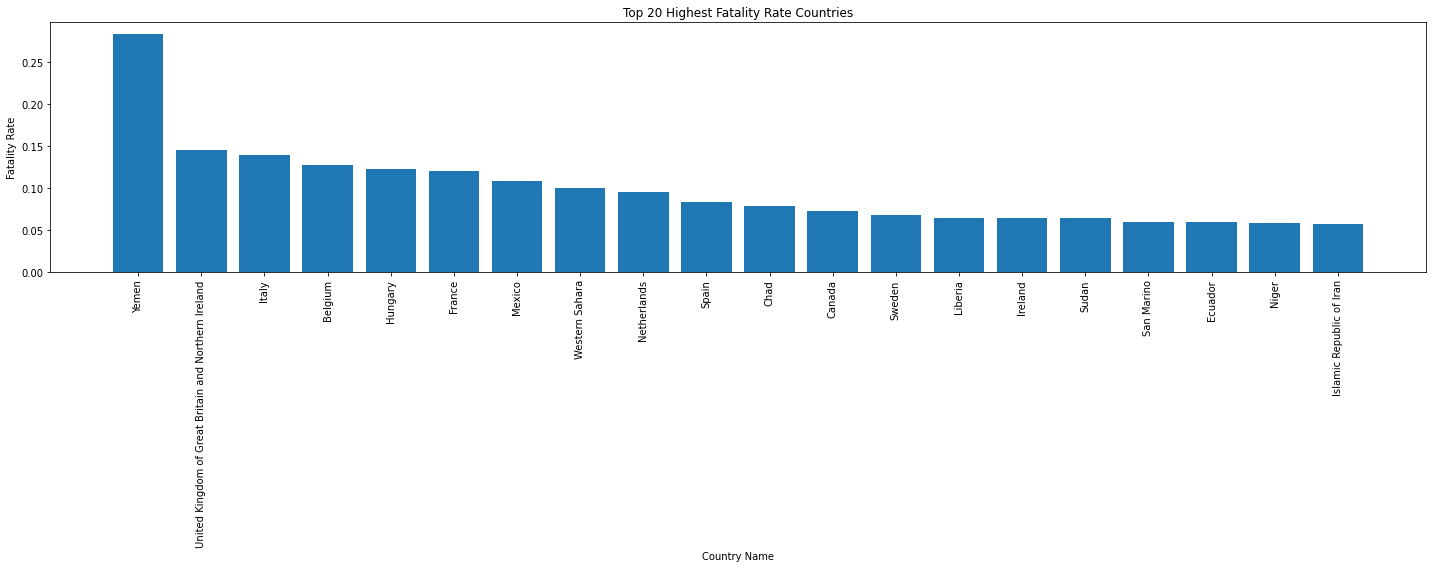

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 8))
x = df_top_20_fatality_rate['name']
y = df_top_20_fatality_rate['fatality_ratio']
plt.bar(x,y)
plt.xlabel('Country Name')
plt.ylabel('Fatality Rate')
plt.title('Top 20 Highest Fatality Rate Countries')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [30]:
countries = ['ID','MY','SG','TH','VN']
i = 0
for country in countries:
    covid_timeline_url = 'https://covid19-api.org/api/timeline/'+country
    df_covid_timeline = pd.io.json.json_normalize(get_json(covid_timeline_url))
    df_covid_timeline['last_update'] = pd.to_datetime(df_covid_timeline['last_update'], format='%Y-%m-%dT%H:%M:%S')
    df_covid_timeline['last_update'] = df_covid_timeline['last_update'].apply(lambda x: x.date())
    if i==0:
        df_covid_timeline_merged = df_covid_timeline
    else:
        df_covid_timeline_merged = df_covid_timeline.append(df_covid_timeline_merged, ignore_index=True)
    i=i+1

print(df_covid_timeline_merged.head())

D:\Anconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


  country last_update  cases  deaths  recovered
0      VN  2020-10-07   1099      35       1023
1      VN  2020-10-06   1098      35       1023
2      VN  2020-10-05   1097      35       1022
3      VN  2020-10-04   1096      35       1020
4      VN  2020-10-03   1096      35       1020


In [33]:
df_covid_timeline_denormalized = pd.merge(df_covid_timeline_merged, df_countries , on='country')

In [35]:
import datetime
df_covid_timeline_denormalized = df_covid_timeline_denormalized[(df_covid_timeline_denormalized['last_update'] >= datetime.date(2020, 3, 1))]

In [38]:
country_data

0        True
1        True
2        True
3        True
4        True
        ...  
1173    False
1174    False
1175    False
1176    False
1177    False
Name: country, Length: 1082, dtype: bool

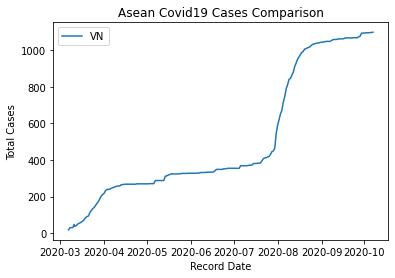

In [37]:
import matplotlib.pyplot as plt
plt.clf()
countries = ['ID','MY','SG','TH','VN']
for country in countries:
    country_data = df_covid_timeline_denormalized['country']==country
    x = df_covid_timeline_denormalized[country_data]['last_update']
    y = df_covid_timeline_denormalized[country_data]['cases']
plt.plot(x, y, label = country)

plt.legend()
plt.xlabel('Record Date')
plt.ylabel('Total Cases')
plt.title('Asean Covid19 Cases Comparison')
plt.show()